<a href="https://colab.research.google.com/github/IIPuBeT-AHgpeu/SII/blob/main/%D0%A1%D0%98%D0%98_%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%9A%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%80%D0%B8%D1%81%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Предсказание одобрения кредита**

Кредитный риск - это возможность убытков в результате неуплаты заемщиком ссуды или невыполнения договорных обязательств. Традиционно это относится к риску того, что кредитор может не получить причитающуюся сумму основного долга и процентов, что приведет к прерыванию движения денежных средств и увеличению затрат на взыскание. Избыточные денежные потоки могут быть записаны для дополнительного покрытия кредитного риска. Когда кредитор сталкивается с повышенным кредитным риском, его можно уменьшить за счет более высокой купонной ставки, что обеспечивает больший денежный поток.

Хотя невозможно точно знать, кто не выполнит обязательства, правильная оценка кредитного риска и управление им могут уменьшить серьезность убытков.

**Бизнес-постановка задачи**

Необходимо оценивать кредитный риск, используя методы машинного обучения.
Задача оценки кредитного риска также может быть нужна для:
* выявления определенных признаков, которые могут повлиять на то вернет ли заемщик кредит;
* оценки критических значений выявленных признаков.

**Постановка цели анализа данных**

Цель данной работы состоит в том, чтобы построить модели машинного обучения на основе заданного набора данных, чтобы предсказать, вернет ли конкретный клиент кредит или нет.
Обучать модель мы будем по данным с платформы kaggle - https://www.kaggle.com/upadorprofzs/credit-risk

# Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM


In [ ]:
data = pd.read_csv('/content/original.csv')
data.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


> **Пояснение по названиям колонок и их значениям**
* clientid- Номер клиента
* income - Доход клиента
* age - Возраст клиента
* loan - Сумма кредита
* default - Значение для одобрения и неодобрения,
где 0 - это хороший клиент,а 1 - это плохой клиент

# Анализ датасета

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


> В датасете 2000 записей. В age имеется 3 нулевых строки. Посмотрим age подробнее.

In [ ]:
data[data['age'] <0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


> Имеются 3 строки с отрицательными значениями. Это скорее всего ошибка при вводе данных. Исправим.

In [ ]:
data.loc[data['age'] < 0, 'age'] = data['age']*-1

> Посмотрим age на пустые значения.

In [ ]:
data[data.age.isnull()]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


> Имеется 3 записи без значений в колонке age. В виду того,что датасет небольшой сделаем замену. Мы вместо пустых значений вставим среднее значение по датасету.

In [ ]:
age_mean = data[data.age.isnull() == False]['age'].mean()
data['age'] = data['age'].fillna(age_mean)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       2000 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


Итак, датасет не содержит нулевых и пустых значений.

# Анализ зависимостей

> Для данной задачи выделим целевую функцию - default, а остальные 4 переменные будут использоваться для прогноза целевой переменной.





**Посмотрим зависимость одобрения кредита и дохода.**

Text(0.5, 1.0, 'Density and distribution of income for default')

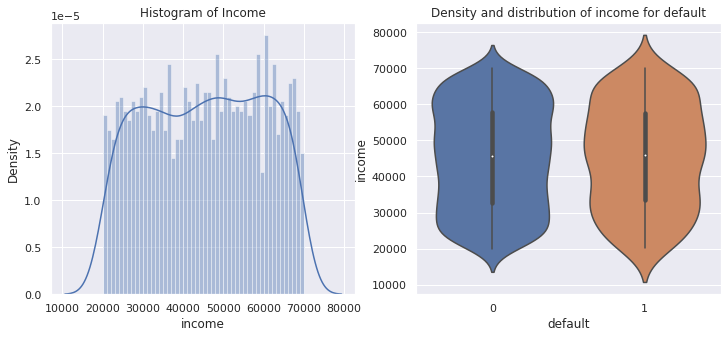

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.distplot( data["income"], bins=50,ax=axes[0]).set_title("Histogram of Income")
viz_1=sns.violinplot(data=data, x='default', y='income', ax=axes[1])
viz_1.set_title('Density and distribution of income for default')

Данные о доходах, как мы видим, равномерно распределены между 20 и 70 тысячи, и нет четкой разницы между распределением доходов для плательщиков и неплательщиков.

**Посмотрим зависимость одобрения кредита и возраста.**

Text(0.5, 1.0, 'Density and distribution of age for default')

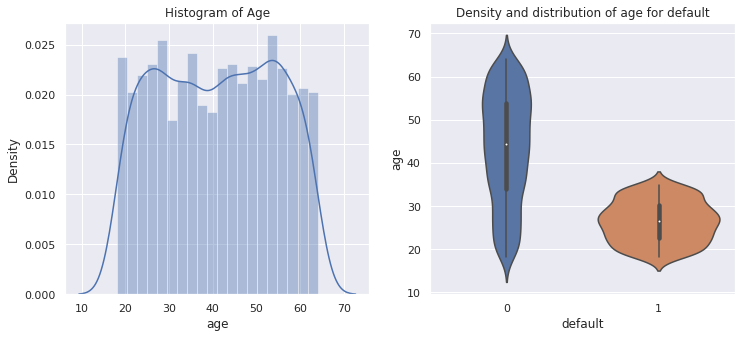

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.distplot( data["age"], bins=20, ax=axes[0]).set_title("Histogram of Age")
viz_2=sns.violinplot(data=data, x='default', y='age', ax=axes[1])
viz_2.set_title('Density and distribution of age for default')

Данные о возрасте, как мы видим, равномерно распределены между 20 и 60 годами. Диапазон возраста неплательщиков ниже и составляет около 30 лет, в то время как диапазон плательщиков выше и составляет от 50 до 60 лет.

**Посмотрим зависимость одобрения кредита и суммы кредита.**

Text(0.5, 1.0, 'Density and distribution of loan for default')

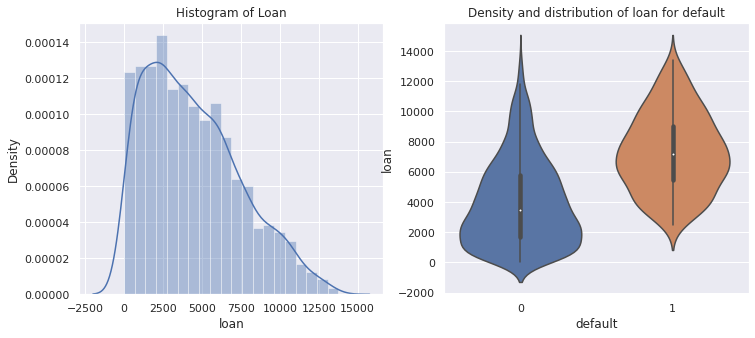

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.distplot( data["loan"], bins=20, ax=axes[0] ).set_title("Histogram of Loan")
viz_3=sns.violinplot(data=data, x='default', y='loan', ax=axes[1] )
viz_3.set_title('Density and distribution of loan for default')

Данные по сумме кредитам, как мы видим, смещены вправо и концентрируются в диапазоне от 0 до 2,5 тыс. Диапазон суммы кредита неплательщиков выше и составляет от 6 тыс. до 8 тыс., в то время как диапазон плательщиков ниже и составляет около 2 тыс.

**Посмотрим количество ненадежных клиентов**


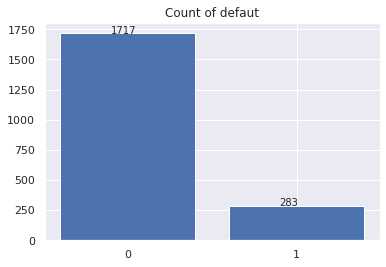

In [ ]:
grouped1 = pd.DataFrame(data.groupby(['default'])['clientid'].count()).reset_index()

label = list(grouped1['clientid'])
plt.bar(grouped1['default'], grouped1['clientid'])
for i in range(len(grouped1)):
    plt.text(x = grouped1['default'][i]-0.1 , y = grouped1['clientid'][i]+0.3, s = label[i], size = 10)

plt.xticks(np.arange(0, 2, 1))
plt.title('Count of defaut')
plt.show()

Количество ненадежных клиентов в данных составляет около 283 из 2000 ( примерно 14%).

**Теперь построим таблицу корреляции**

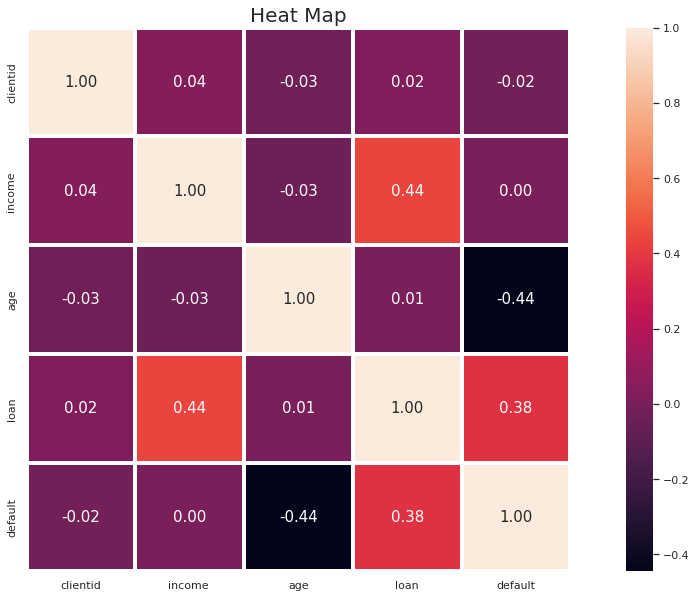

In [ ]:
cols=[ 'clientid', 'income ', 'age', 'loan', 'default']
plt.figure(figsize=(20,10))
plt.title('Heat Map', fontsize=20)
sns.set(font_scale=1.0)
sns.heatmap(data.corr(), cbar=True, annot =True, square=True, fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols, linewidth=3)

> Мы замечаем, что существует положительная корреляция между default и loan. У нас также есть отрицательная корреляция между DEATH_EVENT и age.

**Проверим выбросы**

In [ ]:
fig = px.box(data,  y='age', points="all")
fig.update_layout(
    title_text="Распределение по age")
fig.show()

In [ ]:
fig = px.box(data,  y='loan', points="all")
fig.update_layout(
    title_text="Распределение по loan")
fig.show()

In [ ]:
fig = px.box(data,  y='income', points="all")
fig.update_layout(
    title_text="Распределение по income")
fig.show()

In [ ]:
data.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.924874,4444.369695,0.141500
std,577.494589,14326.327119,13.257782,3045.410024,0.348624
min,1.000000,20014.489470,18.055189,1.377630,0.000000
25%,500.750000,32796.459717,29.062492,1939.708847,0.000000
50%,1000.500000,45789.117313,41.310898,3974.719419,0.000000
75%,1500.250000,57791.281668,52.582340,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


> Выводы:
* Средний возраст 40 лет.
* Максимальный возраст клиента 63 года.
* Минимальный возраст клиента 18 лет.
>---
* Средняя сумма кредита 4444.
* Максимальная сумма кредита  13766.
* Минимальная сумма кредита 1.
>---
* Средний уровень дохода 45331.
* Максимальный уровень дохода 69995.
* Минимальный уровень дохода 20014.

# Обучение моделей

In [ ]:
x = data[["income","age","loan"]]
y = data["default"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [ ]:
def plot_roc_curve(model, X_train, X_test, y_train, y_test):
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    plt.figure(figsize=(12,10))

    print(f'Train roc-auc: {roc_auc_score(y_train, y_train_proba)}')
    print(f'Test roc-auc: {roc_auc_score(y_test, y_test_proba)}')


    plt.plot(*roc_curve(y_train, y_train_proba)[:2], label='train roc-curve')
    plt.plot(*roc_curve(y_test, y_test_proba)[:2], label='test roc-curve')

    plt.plot([0,1], [0,1], linestyle='--', color='black')
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
# Data scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Train roc-auc: 0.9854973395614179
Test roc-auc: 0.9815401321147408


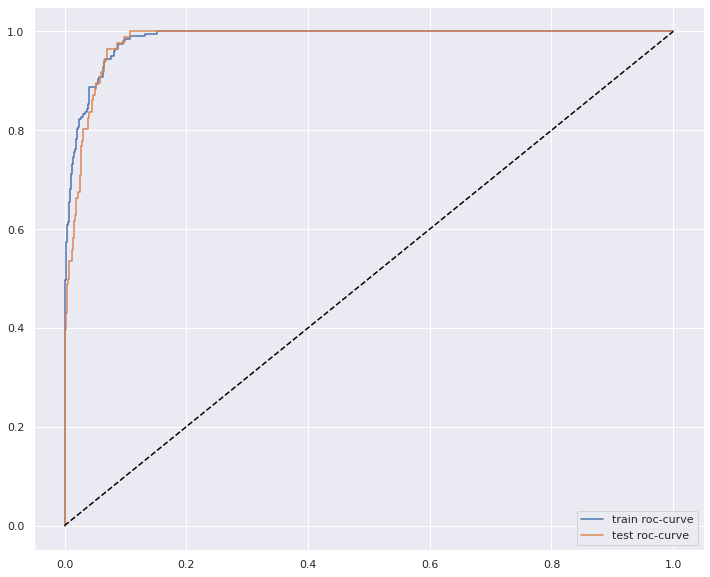

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)
lr_prediction = lr_model.predict_proba(x_test_scaled)[:, 1]

auc_lr = roc_auc_score(y_test, lr_prediction)
mse_lr = mean_squared_error(y_test, lr_prediction)
rmse_lr = np.sqrt(mean_squared_error(y_test,lr_prediction))
mae_lr = mean_absolute_error(y_test,lr_prediction)
r2_lr = r2_score(y_test,lr_prediction)
acc_lr= accuracy_score(y_test,(lr_model.predict(x_test_scaled)))
plot_roc_curve(lr_model, x_train_scaled, x_test_scaled, y_train, y_test)

Train roc-auc: 0.9685684266491132
Test roc-auc: 0.9638041806171387


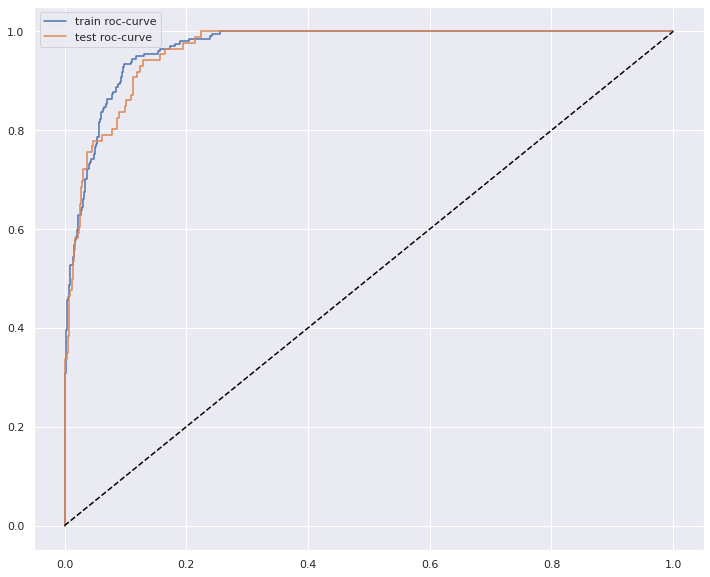

In [ ]:
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)
nb_prediction = nb_model.predict_proba(x_test_scaled)[:, 1]

auc_nb = roc_auc_score(y_test, nb_prediction)
mse_nb = mean_squared_error(y_test, nb_prediction)
rmse_nb = np.sqrt(mean_squared_error(y_test,nb_prediction ))
mae_nb = mean_absolute_error(y_test,nb_prediction )
r2_nb = r2_score(y_test,nb_prediction )
acc_nb = accuracy_score(y_test,(nb_model.predict(x_test_scaled)))
plot_roc_curve(nb_model, x_train_scaled, x_test_scaled, y_train, y_test)

Train roc-auc: 1.0
Test roc-auc: 0.9946384942539137


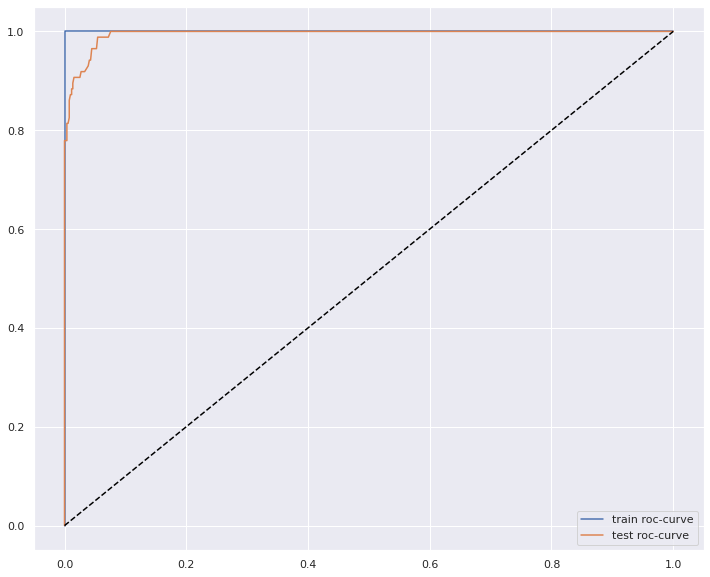

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
rf_prediction = rf_model.predict_proba(x_test_scaled)[:, 1]

auc_rf = roc_auc_score(y_test, rf_prediction)
mse_rf = mean_squared_error(y_test, rf_prediction)
rmse_rf = np.sqrt(mean_squared_error(y_test,rf_prediction ))
mae_rf = mean_absolute_error(y_test,rf_prediction )
r2_rf = r2_score(y_test,rf_prediction )
acc_rf = accuracy_score(y_test,(rf_model.predict(x_test_scaled)))
plot_roc_curve(rf_model, x_train_scaled, x_test_scaled, y_train, y_test)

Train roc-auc: 0.9987953129021777
Test roc-auc: 0.9975454709980998


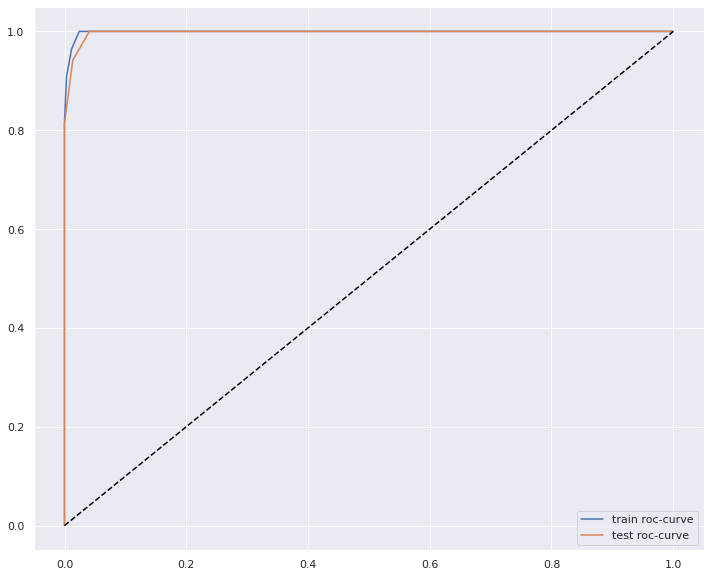

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x_train_scaled, y_train)
knn_prediction = knn_model.predict_proba(x_test_scaled)[:, 1]

auc_knn = roc_auc_score(y_test, knn_prediction)
mse_knn = mean_squared_error(y_test, knn_prediction)
rmse_knn = np.sqrt(mean_squared_error(y_test,knn_prediction ))
mae_knn = mean_absolute_error(y_test,knn_prediction )
r2_knn = r2_score(y_test,knn_prediction )
acc_knn = accuracy_score(y_test,(knn_model.predict(x_test_scaled)))
plot_roc_curve(knn_model, x_train_scaled, x_test_scaled, y_train, y_test)

Train roc-auc: 0.9999789021524024
Test roc-auc: 0.9936317980273278


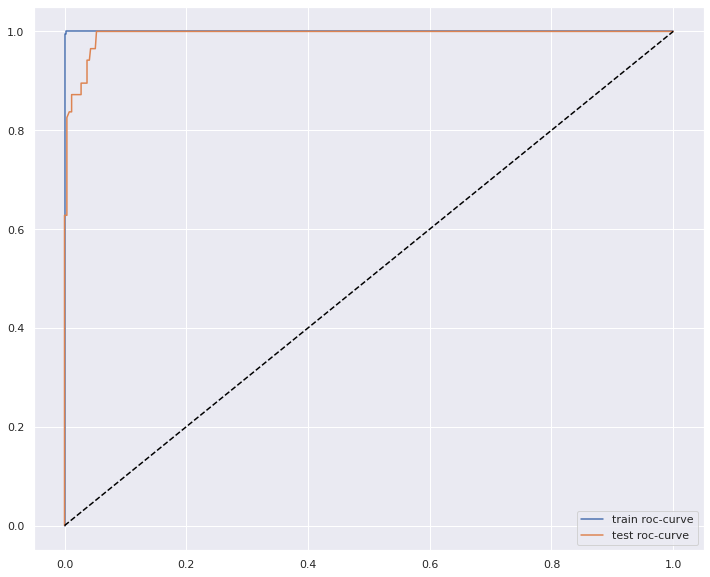

In [ ]:
gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train_scaled,y_train)
gradientboost_prediction = gradientboost_clf.predict_proba(x_test_scaled)[:, 1]

auc_gradientboost = roc_auc_score(y_test, gradientboost_prediction)
mse_gradientboost = mean_squared_error(y_test, gradientboost_prediction)
rmse_gradientboost = np.sqrt(mean_squared_error(y_test,gradientboost_prediction))
mae_gradientboost = mean_absolute_error(y_test,gradientboost_prediction )
r2_gradientboost = r2_score(y_test,gradientboost_prediction )
acc_gradientboos = accuracy_score(y_test,(gradientboost_clf.predict(x_test_scaled)))
plot_roc_curve(gradientboost_clf, x_train_scaled, x_test_scaled, y_train, y_test)

Train roc-auc: 0.9547050309927381
Test roc-auc: 0.9367251832413357


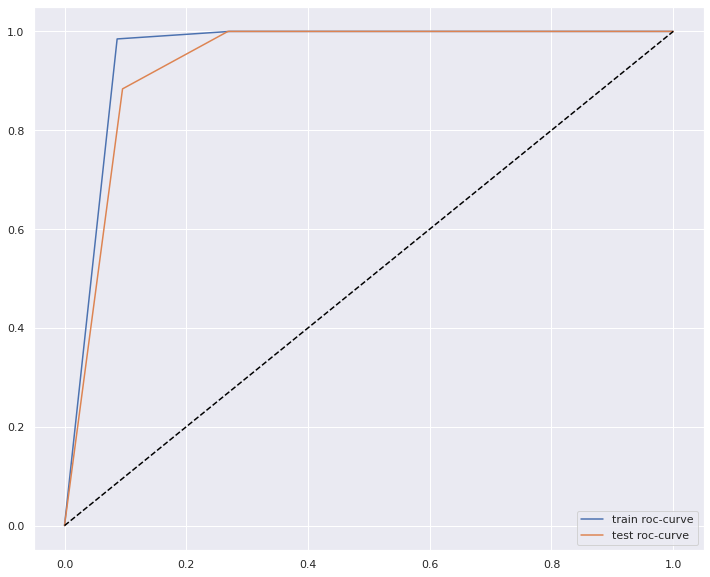

In [ ]:
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dt_model.fit(x_train_scaled, y_train)
dt_prediction = dt_model.predict_proba(x_test_scaled)[:, 1]

auc_dt = roc_auc_score(y_test, dt_prediction)
mse_dt = mean_squared_error(y_test, dt_prediction)
rmse_dt = np.sqrt(mean_squared_error(y_test,dt_prediction))
mae_dt = mean_absolute_error(y_test,dt_prediction)
r2_dt = r2_score(y_test,dt_prediction)
acc_dt = accuracy_score(y_test,(dt_model.predict(x_test_scaled)))
plot_roc_curve(dt_model, x_train_scaled, x_test_scaled, y_train, y_test)

# Нейросеть

In [ ]:
model = Sequential()

model.add(Embedding(70000, 256, input_length=3))
model.add(LSTM(500, activation='relu', return_sequences=True))
model.add(LSTM(300, activation='relu', return_sequences=True))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
44/44 [==============================] - 13s 170ms/step - loss: 0.1174 - accuracy: 0.8579 - val_loss: 0.0980 - val_accuracy: 0.8467
Epoch 2/5
44/44 [==============================] - 7s 157ms/step - loss: 0.0393 - accuracy: 0.9514 - val_loss: 0.0947 - val_accuracy: 0.8483
Epoch 3/5
44/44 [==============================] - 7s 155ms/step - loss: 0.0192 - accuracy: 0.9757 - val_loss: 0.0905 - val_accuracy: 0.8550
Epoch 4/5
44/44 [==============================] - 7s 160ms/step - loss: 0.0029 - accuracy: 0.9986 - val_loss: 0.1136 - val_accuracy: 0.7967
Epoch 5/5
44/44 [==============================] - 7s 159ms/step - loss: 4.4317e-04 - accuracy: 1.0000 - val_loss: 0.1189 - val_accuracy: 0.7883


In [ ]:
ypred = model.predict(x_test)

auc_nn = str(roc_auc_score(y_test, ypred))
mse_nn = str(mean_squared_error(y_test, ypred))
rmse_nn = str(np.sqrt(mean_squared_error(y_test, ypred)))
mae_nn = str(mean_absolute_error(y_test, ypred))
r2_nn = str(r2_score(y_test, ypred))
score = model.evaluate(x_test, y_test, batch_size=32, verbose=1)
acc_nn = (score[1])

19/19 [==============================] - 0s 18ms/step - loss: 0.1189 - accuracy: 0.7883


# Итоги

In [ ]:
from tabulate import tabulate
value_list = [
              ["Logistic Regression", auc_lr, mse_lr, rmse_lr,mae_lr, r2_lr, acc_lr],
              ["Naive Bayes", auc_nb, mse_nb, rmse_nb, mae_nb, r2_nb, acc_nb],
              ["Random Forest",auc_rf, mse_rf, rmse_rf,mae_rf, r2_rf, acc_rf],
              ["K-Nearest Neighbors", auc_knn, mse_knn, rmse_knn, mae_knn, r2_knn, acc_knn],
              ["Gradient Boosting", auc_gradientboost, mse_gradientboost, rmse_gradientboost, mae_gradientboost, r2_gradientboost, acc_gradientboos],
              ["Decision Tree", auc_dt, mse_dt, rmse_dt, mae_dt, r2_dt, acc_dt],
              ["LSTM", auc_nn, mse_nn, rmse_nn, mae_nn, r2_nn, acc_nn]
            ]
column_list = ["Method", "ROC-AUC","MSE", "RMSE","MAE", "R^2", "Accuracy"]
print(tabulate(value_list,column_list,tablefmt='grid'))

+---------------------+-----------+-----------+----------+-----------+-----------+------------+
| Method              |   ROC-AUC |       MSE |     RMSE |       MAE |       R^2 |   Accuracy |
+=====================+===========+===========+==========+===========+===========+============+
| Logistic Regression |  0.98154  | 0.0404735 | 0.20118  | 0.0834933 | 0.670382  |   0.935    |
+---------------------+-----------+-----------+----------+-----------+-----------+------------+
| Naive Bayes         |  0.963804 | 0.0551694 | 0.234882 | 0.111611  | 0.550697  |   0.92     |
+---------------------+-----------+-----------+----------+-----------+-----------+------------+
| Random Forest       |  0.994638 | 0.0211302 | 0.145362 | 0.0542167 | 0.827915  |   0.973333 |
+---------------------+-----------+-----------+----------+-----------+-----------+------------+
| K-Nearest Neighbors |  0.997545 | 0.0169907 | 0.130349 | 0.0419444 | 0.861626  |   0.973333 |
+---------------------+-----------+-----


Из полученных результатов мы можем сделать следующие выводы:

*   Самым точным оказались  K-Nearest Neighbors, Random Forest и Gradient Boosting, самым неточным LSTM.Это можно наблюдать из графиков ROC-AUС, а также по значениям из таблицы(ROC-AUC и Accuracy)
*   Также судя по значениям функций ошибок (MSE,MAE,RMSE) точным методом считается  K-Nearest Neighbors, а самым неточным остается LSTM.
*   Если обратить внимание на метрику R^2, то также самой точной будет K-Nearest Neighbors, качество модели больше 86%, а  LSTM  меньше 1%.


